## Password_Strength_Classifier


### import package

In [13]:
from zxcvbn import zxcvbn
password_lst = ['123456!','lsdlsd1','intel1','lamborghin1','asv5o9yu','612035180tok','AVYq1lDE4MgAZfNt','WUt9IZzE0OQ7PkNE']
for value in password_lst:
    results = zxcvbn(value)
    print(value,results['score'])

123456! 1
lsdlsd1 1
intel1 1
lamborghin1 1
asv5o9yu 2
612035180tok 4
AVYq1lDE4MgAZfNt 4
WUt9IZzE0OQ7PkNE 4


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn import linear_model

### Exploratory Analysis & Preprocessing

Sample data:
      password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1


b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\n'


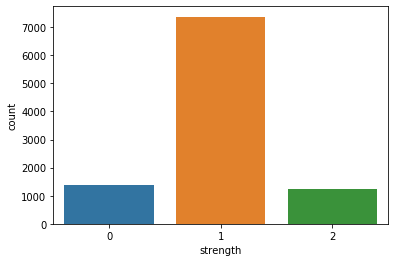

In [2]:
nRowsRead = 10000
data = pd.read_csv('./data.csv', error_bad_lines = False, nrows=nRowsRead)
print(f"Sample data:\n{data.head()}")
data.dropna(inplace=True) # drop NaN row
sns.countplot(data['strength']) # Distribution graphs

## feature extraction

#### UnderSample data


#### hand-designed feature

In [3]:
df1 = data
# df1['length'] = df1['password'].str.len()
df1['numerics'] = df1['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isdigit()]))
df1['alpha'] = df1['password'].apply(lambda x: len([x for x in list(x) if x.isalpha()]))

# vowels = ['a', 'e', 'i', 'o', 'u']
# df1['vowels'] = df1['password'].apply(lambda x: 
#                                       len([x for x in list(x) if x in vowels]))
# df1['consonants'] = df1['password'].apply(lambda x: 
#                                           len([x for x in list(x) if x not in vowels and x.isalpha()]))

df1.head()

,password,strength,numerics,alpha
0,kzde5577,1,4,4
1,kino3434,1,4,4
2,visi7k1yr,1,2,7
3,megzy123,1,3,5
4,lamborghin1,1,1,10


In [4]:
y = df1['strength']
X = df1.drop('strength', axis = 1)
X.head()

,password,numerics,alpha
0,kzde5577,4,4
1,kino3434,4,4
2,visi7k1yr,2,7
3,megzy123,3,5
4,lamborghin1,1,10


## Training

In [5]:
X_trval, X_test, y_trval, y_test = train_test_split(X, y, test_size = 0.2, random_state=33)
X_train, X_val, y_train, y_val = train_test_split(X_trval, y_trval, test_size = 0.2, random_state=33)
print(f"X_trval:{X_trval.shape}, X_test: {X_test.shape}, X_train: {X_train.shape}, X_val: {X_val.shape}")

X_train = X_train.drop('password', axis = 1)
X_val = X_val.drop('password', axis = 1)

clf = SVC(random_state=33,gamma='auto')
# clf = linear_model.LinearRegression()

scaler = StandardScaler().fit(X_train)
X_train_tr = scaler.transform(X_train)
clf.fit(X_train_tr, y_train)
X_val_tr = scaler.transform(X_val)
print(X_val.shape)
y_val_pred = clf.predict(X_val_tr)
y_train_pred = clf.predict(X_train_tr)

print("Accuracy of SVM Classifier (Training): {0:.3f}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("Accuracy of SVM Classifier (Testing): {0:.3f}".format(balanced_accuracy_score(y_val, y_val_pred)))
# scores = cross_val_score(clf, X_val_tr, y_val_pred, cv = 5)
# print("Mean accuracy after 5-fold cross validation: {0:.3f}".format(scores.mean()))
print(classification_report(y_val, y_val_pred))

X_trval:(8000, 3), X_test: (2000, 3), X_train: (6400, 3), X_val: (1600, 3)
(1600, 2)
Accuracy of SVM Classifier (Training): 0.977
Accuracy of SVM Classifier (Testing): 0.982
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       225
           1       0.99      1.00      0.99      1169
           2       1.00      0.95      0.98       206

    accuracy                           0.99      1600
   macro avg       0.99      0.98      0.99      1600
weighted avg       0.99      0.99      0.99      1600



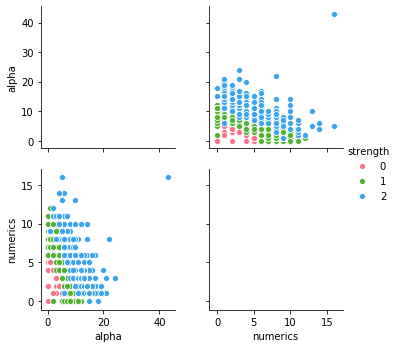

In [6]:
g = sns.pairplot(data = df1, hue = 'strength', vars = df1.columns.difference(['password', 'strength']), 
                 diag_kind = {'kde'}, palette = 'husl')

### Evaluation

In [7]:
X_test = X_test.drop('password', axis = 1)
X_test_tr = scaler.transform(X_test)
y_test_pred = clf.predict(X_test_tr)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       225
           1       0.99      1.00      0.99      1169
           2       1.00      0.95      0.98       206

    accuracy                           0.99      1600
   macro avg       0.99      0.98      0.99      1600
weighted avg       0.99      0.99      0.99      1600

